## Install Package
- Sastrawi
- Swifter
- Wordcloud
- NLTK

In [33]:
# !pip install Sastrawi

In [34]:
# !pip install swifter

In [35]:
# !pip install wordcloud

In [36]:
# !pip install nltk

## Import Package

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
sentimen = pd.read_csv('dataset/final_dataset_without_neutral.csv')
sentimen.head()

,content,label
0,Lemot banget ngirim kode OTP nya ajg,Negative
1,"Daftar pajak email aktivasi sudah, ehh pas ner...",Negative
2,"Pas Nunggu Kode OTP nya emng GK lama,TPI GK ta...",Negative
3,Sangat cocok untuk melihat pajak saya,Positive
4,ngabisin pulsa doang,Negative


In [4]:
sentimen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  1961 non-null   object
 1   label    1961 non-null   object
dtypes: object(2)
memory usage: 30.8+ KB


In [5]:
sentimen.isnull().sum()

content    0
label      0
dtype: int64

In [6]:
sentimen.shape

(1961, 2)

In [7]:
sentimen_label = sentimen['label'].value_counts()
sentimen_label

label
Negative    1675
Positive     286
Name: count, dtype: int64

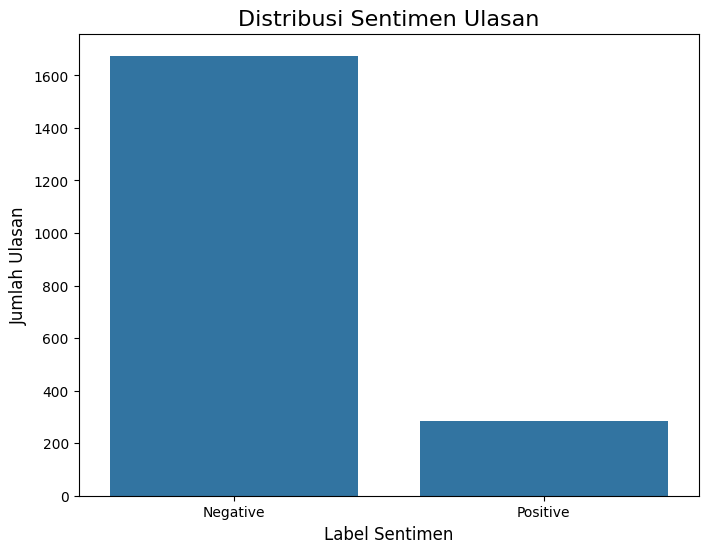

In [8]:
label_counts = sentimen['label'].value_counts()

# Visualisasi dengan bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribusi Sentimen Ulasan', fontsize=16)
plt.xlabel('Label Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.show()

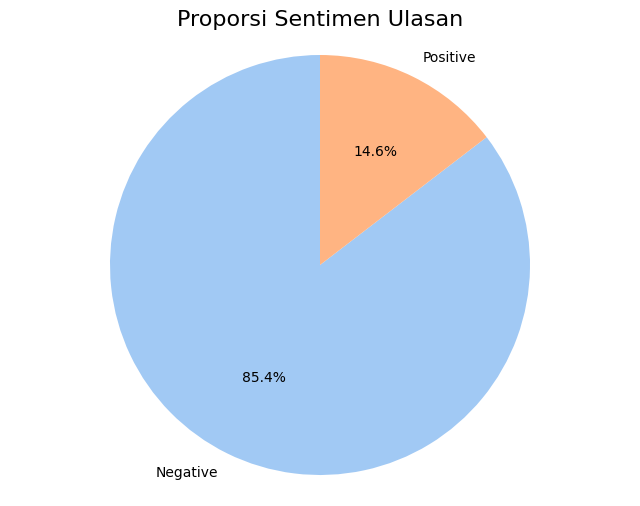

In [9]:
# Visualisasi dengan pie chart
plt.figure(figsize=(8,6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90,
       colors=sns.color_palette('pastel'))
plt.title('Proporsi Sentimen Ulasan', fontsize=16)
plt.axis('equal')
plt.show()

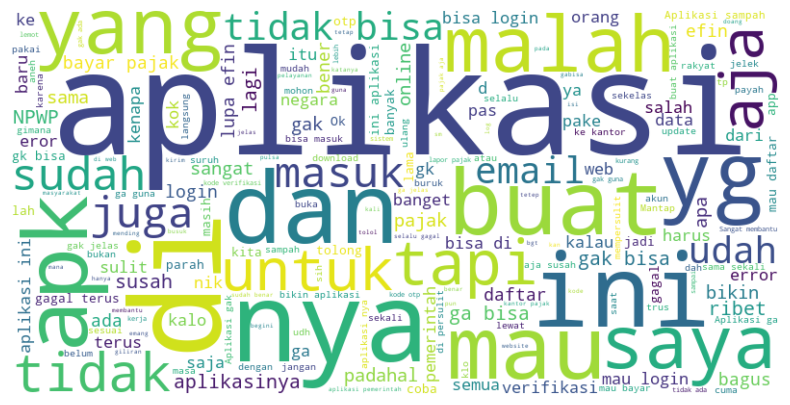

In [10]:
# Wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

text = " ".join(review for review in sentimen['content'])

wordcloud = WordCloud(width=800, height=400,
                      background_color='white', colormap='viridis',
                      stopwords = stopwords).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Preprocessing

#### 1. Cleansing
- Hapus karakter yang tidak diperlukan
- Hapus emoji

In [11]:
import re

def cleansing(sentimen):
    sentimen = re.sub(r'@[A-Za-z0-9]+',' ',sentimen)
    sentimen = re.sub(r'#[A-Za-z0-9]+',' ',sentimen)
    sentimen = re.sub(r'http\S+',' ',sentimen)
    sentimen = re.sub(r'[0-9]+',' ',sentimen)
    sentimen = re.sub(r"[-()\"#/&*@;:<>{}'+=~|.!?,_²]"," ",sentimen)
    sentimen = re.sub(r'\w+\^(\d+)', '', sentimen)
    return sentimen
    
sentimen['content_clean'] = sentimen['content'].apply(cleansing)
sentimen

,content,label,content_clean
0,Lemot banget ngirim kode OTP nya ajg,Negative,Lemot banget ngirim kode OTP nya ajg
1,"Daftar pajak email aktivasi sudah, ehh pas ner...",Negative,Daftar pajak email aktivasi sudah ehh pas ner...
2,"Pas Nunggu Kode OTP nya emng GK lama,TPI GK ta...",Negative,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...
3,Sangat cocok untuk melihat pajak saya,Positive,Sangat cocok untuk melihat pajak saya
4,ngabisin pulsa doang,Negative,ngabisin pulsa doang
...,...,...,...
1956,Biasanya lancar skrg malah gak bisa dipake.,Negative,Biasanya lancar skrg malah gak bisa dipake
1957,"efin aja harus ke kantor,..thn 2023 masih kaku...",Negative,efin aja harus ke kantor thn masih kaku aj...
1958,Sekelas kementrian perpajakan bikin aplikasi a...,Negative,Sekelas kementrian perpajakan bikin aplikasi a...
1959,"Sangat miris ya, app penting dan dikelola peme...",Negative,Sangat miris ya app penting dan dikelola peme...


In [12]:
# cleaning emoji

import re

# Fungsi untuk menghapus emoji
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # simbol dan gambar
        "\U0001F680-\U0001F6FF"  # transportasi dan peta
        "\U0001F700-\U0001F7FF"  # simbol alkimia
        "\U0001F800-\U0001F8FF"  # simbol tambahan
        "\U0001F900-\U0001F9FF"  # emoji baru
        "\U0001F000-\U0001F0FF"  # kartu permainan
        "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r' ', text)  # Mengganti emoji dengan spasi

# Contoh penggunaan
texts = sentimen['content']
cleaned_texts = [remove_emoji(text) for text in texts]

# for original, cleaned in zip(texts, cleaned_texts):
#     print(f"Original: '{original}' - Cleaned: '{cleaned}'")

sentimen['clean_emoji'] = sentimen['content_clean'].apply(remove_emoji)
sentimen

,content,label,content_clean,clean_emoji
0,Lemot banget ngirim kode OTP nya ajg,Negative,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg
1,"Daftar pajak email aktivasi sudah, ehh pas ner...",Negative,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...
2,"Pas Nunggu Kode OTP nya emng GK lama,TPI GK ta...",Negative,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...
3,Sangat cocok untuk melihat pajak saya,Positive,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya
4,ngabisin pulsa doang,Negative,ngabisin pulsa doang,ngabisin pulsa doang
...,...,...,...,...
1956,Biasanya lancar skrg malah gak bisa dipake.,Negative,Biasanya lancar skrg malah gak bisa dipake,Biasanya lancar skrg malah gak bisa dipake
1957,"efin aja harus ke kantor,..thn 2023 masih kaku...",Negative,efin aja harus ke kantor thn masih kaku aj...,efin aja harus ke kantor thn masih kaku aj...
1958,Sekelas kementrian perpajakan bikin aplikasi a...,Negative,Sekelas kementrian perpajakan bikin aplikasi a...,Sekelas kementrian perpajakan bikin aplikasi a...
1959,"Sangat miris ya, app penting dan dikelola peme...",Negative,Sangat miris ya app penting dan dikelola peme...,Sangat miris ya app penting dan dikelola peme...


#### 2. Normalisasi
- Hapus karakter berulang
- caseFolding

In [13]:
# menghapus karakter yang berulang
def replaceTOM(sentimen):
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', sentimen)
sentimen['replaceTOM']= sentimen['clean_emoji'].apply(replaceTOM)
sentimen

,content,label,content_clean,clean_emoji,replaceTOM
0,Lemot banget ngirim kode OTP nya ajg,Negative,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg
1,"Daftar pajak email aktivasi sudah, ehh pas ner...",Negative,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...
2,"Pas Nunggu Kode OTP nya emng GK lama,TPI GK ta...",Negative,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...
3,Sangat cocok untuk melihat pajak saya,Positive,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya
4,ngabisin pulsa doang,Negative,ngabisin pulsa doang,ngabisin pulsa doang,ngabisin pulsa doang
...,...,...,...,...,...
1956,Biasanya lancar skrg malah gak bisa dipake.,Negative,Biasanya lancar skrg malah gak bisa dipake,Biasanya lancar skrg malah gak bisa dipake,Biasanya lancar skrg malah gak bisa dipake
1957,"efin aja harus ke kantor,..thn 2023 masih kaku...",Negative,efin aja harus ke kantor thn masih kaku aj...,efin aja harus ke kantor thn masih kaku aj...,efin aja harus ke kantor thn masih kaku aja
1958,Sekelas kementrian perpajakan bikin aplikasi a...,Negative,Sekelas kementrian perpajakan bikin aplikasi a...,Sekelas kementrian perpajakan bikin aplikasi a...,Sekelas kementrian perpajakan bikin aplikasi a...
1959,"Sangat miris ya, app penting dan dikelola peme...",Negative,Sangat miris ya app penting dan dikelola peme...,Sangat miris ya app penting dan dikelola peme...,Sangat miris ya app penting dan dikelola peme...


In [14]:
# caseFolding
def caseFolding(sentimen):
    sentimen = sentimen.lower()
    return sentimen
sentimen['caseFolding'] = sentimen['replaceTOM'].apply(caseFolding)
sentimen

,content,label,content_clean,clean_emoji,replaceTOM,caseFolding
0,Lemot banget ngirim kode OTP nya ajg,Negative,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg,lemot banget ngirim kode otp nya ajg
1,"Daftar pajak email aktivasi sudah, ehh pas ner...",Negative,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...,daftar pajak email aktivasi sudah ehh pas ner...
2,"Pas Nunggu Kode OTP nya emng GK lama,TPI GK ta...",Negative,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,pas nunggu kode otp nya emng gk lama tpi gk ta...
3,Sangat cocok untuk melihat pajak saya,Positive,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya,sangat cocok untuk melihat pajak saya
4,ngabisin pulsa doang,Negative,ngabisin pulsa doang,ngabisin pulsa doang,ngabisin pulsa doang,ngabisin pulsa doang
...,...,...,...,...,...,...
1956,Biasanya lancar skrg malah gak bisa dipake.,Negative,Biasanya lancar skrg malah gak bisa dipake,Biasanya lancar skrg malah gak bisa dipake,Biasanya lancar skrg malah gak bisa dipake,biasanya lancar skrg malah gak bisa dipake
1957,"efin aja harus ke kantor,..thn 2023 masih kaku...",Negative,efin aja harus ke kantor thn masih kaku aj...,efin aja harus ke kantor thn masih kaku aj...,efin aja harus ke kantor thn masih kaku aja,efin aja harus ke kantor thn masih kaku aja
1958,Sekelas kementrian perpajakan bikin aplikasi a...,Negative,Sekelas kementrian perpajakan bikin aplikasi a...,Sekelas kementrian perpajakan bikin aplikasi a...,Sekelas kementrian perpajakan bikin aplikasi a...,sekelas kementrian perpajakan bikin aplikasi a...
1959,"Sangat miris ya, app penting dan dikelola peme...",Negative,Sangat miris ya app penting dan dikelola peme...,Sangat miris ya app penting dan dikelola peme...,Sangat miris ya app penting dan dikelola peme...,sangat miris ya app penting dan dikelola peme...


In [15]:
# hapus spasi
sentimen['caseFolding'] = sentimen['caseFolding'].str.replace(r'\s+', ' ', regex=True).str.strip()
sentimen.head()

,content,label,content_clean,clean_emoji,replaceTOM,caseFolding
0,Lemot banget ngirim kode OTP nya ajg,Negative,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg,lemot banget ngirim kode otp nya ajg
1,"Daftar pajak email aktivasi sudah, ehh pas ner...",Negative,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...,daftar pajak email aktivasi sudah ehh pas neri...
2,"Pas Nunggu Kode OTP nya emng GK lama,TPI GK ta...",Negative,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,pas nunggu kode otp nya emng gk lama tpi gk ta...
3,Sangat cocok untuk melihat pajak saya,Positive,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya,sangat cocok untuk melihat pajak saya
4,ngabisin pulsa doang,Negative,ngabisin pulsa doang,ngabisin pulsa doang,ngabisin pulsa doang,ngabisin pulsa doang


#### 3. Tokenizing
- kalimat diuraikan menjadi kata terpisah

In [16]:
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt_tab')

def tokenize(sentimen):
    sentimen = word_tokenize(sentimen)
    return sentimen

sentimen['tokenizing'] = sentimen['caseFolding'].apply(tokenize)
sentimen.head()

,content,label,content_clean,clean_emoji,replaceTOM,caseFolding,tokenizing
0,Lemot banget ngirim kode OTP nya ajg,Negative,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg,lemot banget ngirim kode otp nya ajg,"[lemot, banget, ngirim, kode, otp, nya, ajg]"
1,"Daftar pajak email aktivasi sudah, ehh pas ner...",Negative,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...,daftar pajak email aktivasi sudah ehh pas neri...,"[daftar, pajak, email, aktivasi, sudah, ehh, p..."
2,"Pas Nunggu Kode OTP nya emng GK lama,TPI GK ta...",Negative,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,pas nunggu kode otp nya emng gk lama tpi gk ta...,"[pas, nunggu, kode, otp, nya, emng, gk, lama, ..."
3,Sangat cocok untuk melihat pajak saya,Positive,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya,sangat cocok untuk melihat pajak saya,"[sangat, cocok, untuk, melihat, pajak, saya]"
4,ngabisin pulsa doang,Negative,ngabisin pulsa doang,ngabisin pulsa doang,ngabisin pulsa doang,ngabisin pulsa doang,"[ngabisin, pulsa, doang]"


#### 4. Formalisasi

In [17]:
def formalisasi(sentimen):
    slang = eval(open("dataset/slangwords_typo.txt").read())
    pattern = re.compile(r'\b( ' + '|'.join(slang.keys())+r')\b')
    content = []
    for kata in sentimen:
        filter = pattern.sub(lambda x: slang[x.group()], kata)
        content.append(filter.lower())
    sentimen = content
    return sentimen

sentimen['formalisasi'] = sentimen['tokenizing'].apply(formalisasi)

In [18]:
sentimen.head()

,content,label,content_clean,clean_emoji,replaceTOM,caseFolding,tokenizing,formalisasi
0,Lemot banget ngirim kode OTP nya ajg,Negative,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg,lemot banget ngirim kode otp nya ajg,"[lemot, banget, ngirim, kode, otp, nya, ajg]","[lambat, banget, mengirim, kode, otp, nya, anj..."
1,"Daftar pajak email aktivasi sudah, ehh pas ner...",Negative,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...,daftar pajak email aktivasi sudah ehh pas neri...,"[daftar, pajak, email, aktivasi, sudah, ehh, p...","[daftar, pajak, email, aktivasi, sudah, ehh, w..."
2,"Pas Nunggu Kode OTP nya emng GK lama,TPI GK ta...",Negative,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,pas nunggu kode otp nya emng gk lama tpi gk ta...,"[pas, nunggu, kode, otp, nya, emng, gk, lama, ...","[waktu, menunggu, kode, otp, nya, memang, tida..."
3,Sangat cocok untuk melihat pajak saya,Positive,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya,sangat cocok untuk melihat pajak saya,"[sangat, cocok, untuk, melihat, pajak, saya]","[sangat, cocok, untuk, melihat, pajak, saya]"
4,ngabisin pulsa doang,Negative,ngabisin pulsa doang,ngabisin pulsa doang,ngabisin pulsa doang,ngabisin pulsa doang,"[ngabisin, pulsa, doang]","[menghabiskan, pulsa, saja]"


In [19]:
# Menggunakan apply untuk menerapkan " ".join ke setiap baris
# Dilakukan join karena setelah formalisasi ada yang awalnya 1 kata menjadi 2 kata

sentimen['join'] = sentimen['formalisasi'].apply(lambda x: " ".join(x))
sentimen.head()

,content,label,content_clean,clean_emoji,replaceTOM,caseFolding,tokenizing,formalisasi,join
0,Lemot banget ngirim kode OTP nya ajg,Negative,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg,lemot banget ngirim kode otp nya ajg,"[lemot, banget, ngirim, kode, otp, nya, ajg]","[lambat, banget, mengirim, kode, otp, nya, anj...",lambat banget mengirim kode otp nya anjing
1,"Daftar pajak email aktivasi sudah, ehh pas ner...",Negative,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...,daftar pajak email aktivasi sudah ehh pas neri...,"[daftar, pajak, email, aktivasi, sudah, ehh, p...","[daftar, pajak, email, aktivasi, sudah, ehh, w...",daftar pajak email aktivasi sudah ehh waktu me...
2,"Pas Nunggu Kode OTP nya emng GK lama,TPI GK ta...",Negative,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,pas nunggu kode otp nya emng gk lama tpi gk ta...,"[pas, nunggu, kode, otp, nya, emng, gk, lama, ...","[waktu, menunggu, kode, otp, nya, memang, tida...",waktu menunggu kode otp nya memang tidak lama ...
3,Sangat cocok untuk melihat pajak saya,Positive,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya,sangat cocok untuk melihat pajak saya,"[sangat, cocok, untuk, melihat, pajak, saya]","[sangat, cocok, untuk, melihat, pajak, saya]",sangat cocok untuk melihat pajak saya
4,ngabisin pulsa doang,Negative,ngabisin pulsa doang,ngabisin pulsa doang,ngabisin pulsa doang,ngabisin pulsa doang,"[ngabisin, pulsa, doang]","[menghabiskan, pulsa, saja]",menghabiskan pulsa saja


In [20]:
# Tokenize ulang setelah dilakukan join
import nltk
from nltk.tokenize import word_tokenize

def tokenize(sentimen):
    sentimen = word_tokenize(sentimen)
    return sentimen

sentimen['tokenizing_final'] = sentimen['join'].apply(tokenize)
sentimen.head()

,content,label,content_clean,clean_emoji,replaceTOM,caseFolding,tokenizing,formalisasi,join,tokenizing_final
0,Lemot banget ngirim kode OTP nya ajg,Negative,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg,lemot banget ngirim kode otp nya ajg,"[lemot, banget, ngirim, kode, otp, nya, ajg]","[lambat, banget, mengirim, kode, otp, nya, anj...",lambat banget mengirim kode otp nya anjing,"[lambat, banget, mengirim, kode, otp, nya, anj..."
1,"Daftar pajak email aktivasi sudah, ehh pas ner...",Negative,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...,daftar pajak email aktivasi sudah ehh pas neri...,"[daftar, pajak, email, aktivasi, sudah, ehh, p...","[daftar, pajak, email, aktivasi, sudah, ehh, w...",daftar pajak email aktivasi sudah ehh waktu me...,"[daftar, pajak, email, aktivasi, sudah, ehh, w..."
2,"Pas Nunggu Kode OTP nya emng GK lama,TPI GK ta...",Negative,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,pas nunggu kode otp nya emng gk lama tpi gk ta...,"[pas, nunggu, kode, otp, nya, emng, gk, lama, ...","[waktu, menunggu, kode, otp, nya, memang, tida...",waktu menunggu kode otp nya memang tidak lama ...,"[waktu, menunggu, kode, otp, nya, memang, tida..."
3,Sangat cocok untuk melihat pajak saya,Positive,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya,sangat cocok untuk melihat pajak saya,"[sangat, cocok, untuk, melihat, pajak, saya]","[sangat, cocok, untuk, melihat, pajak, saya]",sangat cocok untuk melihat pajak saya,"[sangat, cocok, untuk, melihat, pajak, saya]"
4,ngabisin pulsa doang,Negative,ngabisin pulsa doang,ngabisin pulsa doang,ngabisin pulsa doang,ngabisin pulsa doang,"[ngabisin, pulsa, doang]","[menghabiskan, pulsa, saja]",menghabiskan pulsa saja,"[menghabiskan, pulsa, saja]"


#### 5. Stopwords Removal

In [21]:
from nltk.corpus import stopwords
#nltk.download('stopwords')

stopword_list = stopwords.words('indonesian')
#stopword_list


# ----- additional stopwords
stopword_list.extend(['eh', 'ehh', 'hadeh', 'hadeuh', "hadeh", "ehh", "dah", "woy", "eh", 
                      "jan", "ne", "dah", "deh", "sih", "woi", "hadeuh", "halah", "laah", 
                      "lah", "hmmmm", "hm", "bang", "dih", "uprit", "sihh", "sih", "hadehhh", 
                      "loh", "mah", "lah", "bos", "ah", "ealah", "bah", "hedeh", "loh", "ckckck", 
                      "wkwk", "wkwkwk", "ngoni", "daa", "kea", "oi", "deh", "e", "cok", "cox", 
                      "eehh", "co", "cuih", "weh", "eyy", "haaa", "welll", "wel", "phei", "wkwkwk"])
stopword_list = set(stopword_list)

remove_list = ['tidak', 'bisa']

for i in remove_list:
    if i in stopword_list:
        stopword_list.remove(i)

def stopwordText(words):
    return [word for word in words if word not in stopword_list]

sentimen['stopword_removal'] = sentimen['formalisasi'].apply(stopwordText)
sentimen.head()

,content,label,content_clean,clean_emoji,replaceTOM,caseFolding,tokenizing,formalisasi,join,tokenizing_final,stopword_removal
0,Lemot banget ngirim kode OTP nya ajg,Negative,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg,Lemot banget ngirim kode OTP nya ajg,lemot banget ngirim kode otp nya ajg,"[lemot, banget, ngirim, kode, otp, nya, ajg]","[lambat, banget, mengirim, kode, otp, nya, anj...",lambat banget mengirim kode otp nya anjing,"[lambat, banget, mengirim, kode, otp, nya, anj...","[lambat, banget, mengirim, kode, otp, nya, anj..."
1,"Daftar pajak email aktivasi sudah, ehh pas ner...",Negative,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...,Daftar pajak email aktivasi sudah ehh pas ner...,daftar pajak email aktivasi sudah ehh pas neri...,"[daftar, pajak, email, aktivasi, sudah, ehh, p...","[daftar, pajak, email, aktivasi, sudah, ehh, w...",daftar pajak email aktivasi sudah ehh waktu me...,"[daftar, pajak, email, aktivasi, sudah, ehh, w...","[daftar, pajak, email, aktivasi, menerima, kod..."
2,"Pas Nunggu Kode OTP nya emng GK lama,TPI GK ta...",Negative,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,Pas Nunggu Kode OTP nya emng GK lama TPI GK ta...,pas nunggu kode otp nya emng gk lama tpi gk ta...,"[pas, nunggu, kode, otp, nya, emng, gk, lama, ...","[waktu, menunggu, kode, otp, nya, memang, tida...",waktu menunggu kode otp nya memang tidak lama ...,"[waktu, menunggu, kode, otp, nya, memang, tida...","[menunggu, kode, otp, nya, tidak, tidak, tekan..."
3,Sangat cocok untuk melihat pajak saya,Positive,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya,Sangat cocok untuk melihat pajak saya,sangat cocok untuk melihat pajak saya,"[sangat, cocok, untuk, melihat, pajak, saya]","[sangat, cocok, untuk, melihat, pajak, saya]",sangat cocok untuk melihat pajak saya,"[sangat, cocok, untuk, melihat, pajak, saya]","[cocok, pajak]"
4,ngabisin pulsa doang,Negative,ngabisin pulsa doang,ngabisin pulsa doang,ngabisin pulsa doang,ngabisin pulsa doang,"[ngabisin, pulsa, doang]","[menghabiskan, pulsa, saja]",menghabiskan pulsa saja,"[menghabiskan, pulsa, saja]","[menghabiskan, pulsa]"


#### 6. Stemming
Proses stemming -> mengubah kata berimbuhan menjadi kata dasar dengan library Sastrawi dan Swifter

In [22]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in sentimen['stopword_removal']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term, ":", term_dict[term])

def stemming(document):
    return [term_dict[term] for term in document]

sentimen['stemming'] = sentimen['stopword_removal'].swifter.apply(stemming)

lambat : lambat
banget : banget
mengirim : kirim
kode : kode
otp : otp
nya : nya
anjing : anjing
daftar : daftar
pajak : pajak
email : email
aktivasi : aktivasi
menerima : terima
nomor : nomor
seluler : seluler
tidak : tidak
muncul : muncul
jam : jam
tunggu : tunggu
ulang : ulang
coba : coba
mempersulit : sulit
menunggu : tunggu
tekan : tekan
salah : salah
melulu : melulu
ngehang : ngehang
mohon : mohon
diperbaiki : baik
cocok : cocok
menghabiskan : habis
pulsa : pulsa
berputar : putar
buka : buka
aplikasi : aplikasi
situs : situs
bisa : bisa
akun : akun
blokir : blokir
ceritanya : cerita
mengurus : urus
npwp : npwp
gagal : gagal
kesal : kesal
isi : isi
sampah : sampah
dipakai : pakai
berfungsi : fungsi
terhormat : hormat
perbaiki : baik
masuknya : masuk
susah : susah
sekalinya : sekali
ambil : ambil
verifikasi : verifikasi
gmail : gmail
tahap : tahap
dipertimbangkan : timbang
nama : nama
lembaga : lembaga
oke : oke
berkembang : kembang
semoga : moga
registrasi : registrasi
sumpah : su

Pandas Apply:   0%|          | 0/1961 [00:00<?, ?it/s]

## Visualisasi

#### 1. Wordcloud

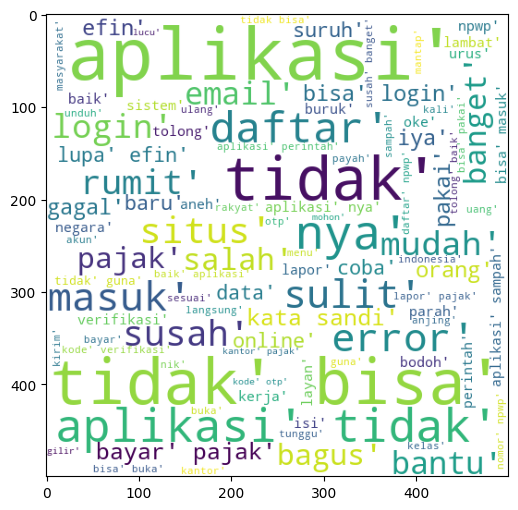

In [23]:
stem_list = sentimen['stemming'].tolist()
stem_ls = []
for w in stem_list:
    stem_ls += w

from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,
              background_color='white')
stemming_words = wc.generate(str(stem_ls))
plt.figure(figsize=(6, 6))
plt.imshow(stemming_words)

#### 2. Bar Chart

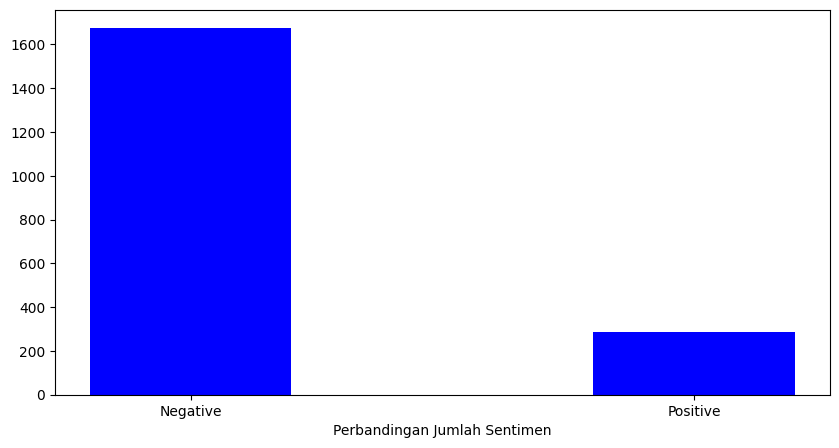

In [24]:
negative_label = (sentimen[sentimen['label'] == 'Negative']['label']).count()
positive_label = (sentimen[sentimen['label'] == 'Positive']['label']).count()

label = ['Negative', 'Positive']
values = [negative_label, positive_label]

fig = plt.figure(figsize=(10, 5))

plt.bar(label, values, color='blue', width=0.4)

plt.xlabel('Sentiment Value')
plt.xlabel('Numbers of Value')
plt.xlabel('Perbandingan Jumlah Sentimen')
plt.show()

#### 3. Pie Chart

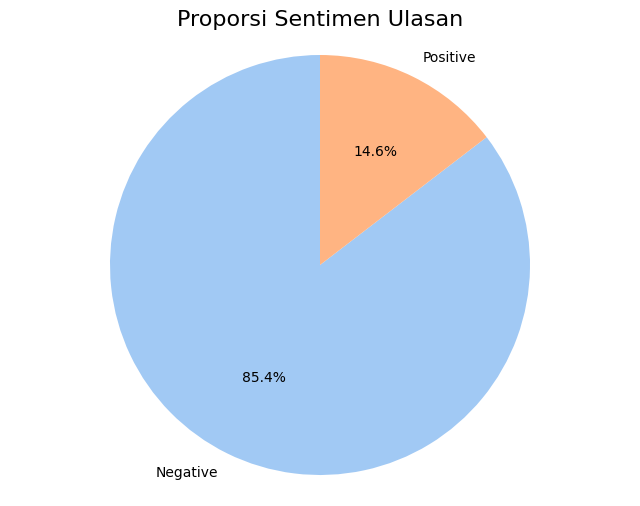

In [25]:
# Visualisasi dengan pie chart
plt.figure(figsize=(8,6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90,
       colors=sns.color_palette('pastel'))
plt.title('Proporsi Sentimen Ulasan', fontsize=16)
plt.axis('equal')
plt.show()

## Splitting & Feature Extraction (TF-IDF)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = sentimen['stemming']
Y = sentimen['label']

# Pembagian data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y)


# Pembobotan TF-IDF
def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(analyzer='word',
                            tokenizer=dummy_fun,
                            preprocessor=dummy_fun,
                            token_pattern=None)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


# Encoding Label
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [68]:
import pandas as pd

# Matriks TF-IDF pada data pelatihan
X_train_tfidf = X_train.toarray()  # Mengubah matriks sparse menjadi array numpy

# Fitur yang dikenali oleh TfidfVectorizer
features = vectorizer.get_feature_names_out()

# Membuat DataFrame untuk hasil TF-IDF
df_tfidf_train = pd.DataFrame(X_train_tfidf, columns=features)

# # Tampilkan DataFrame hasil TF-IDF pada data pelatihan
# print(df_tfidf_train.iloc[10])  # Menampilkan beberapa baris pertama

dokumen_pertama = df_tfidf_train.loc[26]
dokumen_pertama_non_zero = dokumen_pertama[dokumen_pertama > 0]
dokumen_tf_idf = pd.DataFrame(dokumen_pertama_non_zero)
dokumen_tf_idf

,26
aneh,0.179559
banget,0.131437
data,0.148771
efin,0.500770
gagal,0.139305
ktp,0.210381
lupa,0.443415
masuk,0.483025
menu,0.195956
npwp,0.132375


## Klasifikasi

### SVM (Support Vector Machine)
Klasifikasi sentimen dilakukan dengan algoritma SVM dibantu scikit-learn. Proses ini menggunakan data latih dan data uji sebesar 75%:25%, dilakukan percobaan sebanyak 15x dan kernel akan menggunakan kernel rbf

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

svm_model = SVC(kernel='rbf', probability=True)

# cross validation
acc_score = cross_val_score(svm_model, X_train, y_train, cv=15, scoring='accuracy')

# fitting model dengan data resampling
svm_model.fit(X_train, y_train)

# predict
y_pred_svm = svm_model.predict(X_test)

print(f"Hasil Rata - Rata Accuracy : {acc_score.mean()}")

Hasil Rata - Rata Accuracy : 0.953061224489796


### Naive Bayes
Klasifikasi sentimen dilakukan dengan algoritma Naive Bayes dibantu scikit-learn. Proses ini menggunakan data latih dan data uji sebesar 75%:25%, dilakukan percobaan sebanyak 15x.

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()

# cross validation
acc_score_nb = cross_val_score(mnb, X_train, y_train, cv=15, scoring='accuracy')

# fitting model
mnb.fit(X_train, y_train)

# predict model
y_pred_nb = mnb.predict(X_test)


print(f"Hasil rata - rata akurasi : {acc_score_nb.mean()}")

Hasil rata - rata akurasi : 0.9360544217687076


## Report

#### SVM Train

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

y_train_pred = svm_model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1260
           1       0.99      0.94      0.96       210

    accuracy                           0.99      1470
   macro avg       0.99      0.97      0.98      1470
weighted avg       0.99      0.99      0.99      1470



#### Naive Bayes Train

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

y_train_pred_mnb = mnb.predict(X_train)
print(classification_report(y_train, y_train_pred_mnb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1260
           1       0.99      0.64      0.78       210

    accuracy                           0.95      1470
   macro avg       0.97      0.82      0.87      1470
weighted avg       0.95      0.95      0.94      1470



#### SVM Test

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       415
           1       0.94      0.78      0.85        76

    accuracy                           0.96       491
   macro avg       0.95      0.88      0.91       491
weighted avg       0.96      0.96      0.96       491



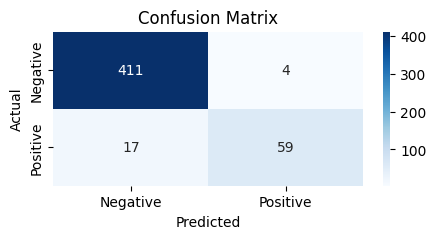

In [73]:
print(classification_report(y_test, y_pred_svm))
svm_matrix = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5, 2))
sns.heatmap(svm_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Negative', 'Positive'],
           yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

[[411   4]
 [ 17  59]]


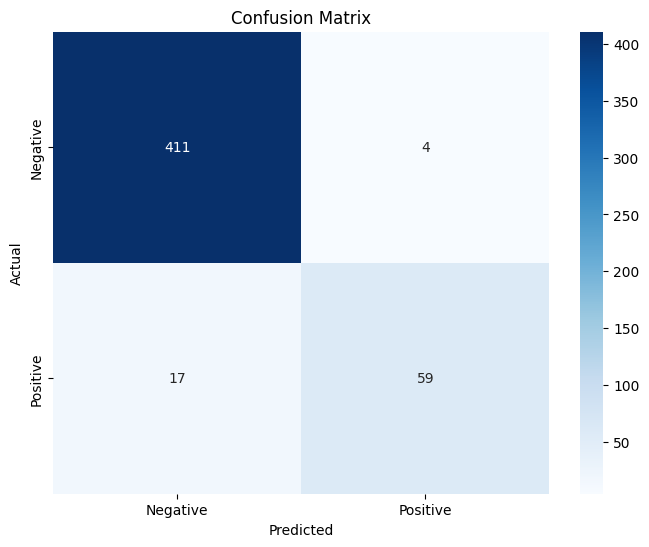

In [32]:
svm_matrix = confusion_matrix(y_test, y_pred_svm)
print(svm_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Negative', 'Positive'],
           yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### Naive Bayes Test

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       415
           1       0.98      0.61      0.75        76

    accuracy                           0.94       491
   macro avg       0.96      0.80      0.86       491
weighted avg       0.94      0.94      0.93       491



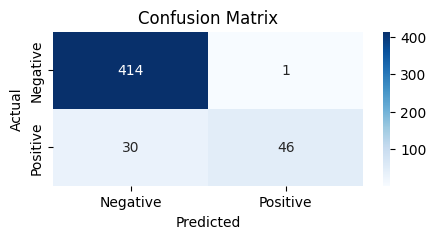

In [72]:
print(classification_report(y_test, y_pred_nb))
nb_matrix = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5, 2))
sns.heatmap(nb_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Negative', 'Positive'],
           yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

[[414   1]
 [ 30  46]]


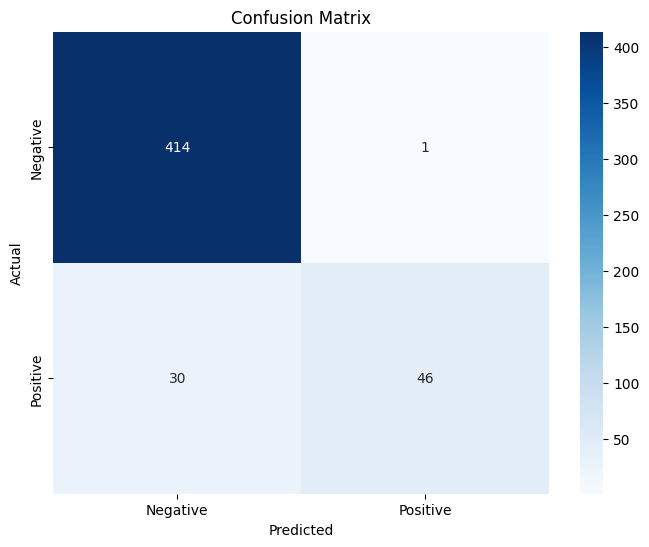

In [34]:
nb_matrix = confusion_matrix(y_test, y_pred_nb)
print(nb_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(nb_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Negative', 'Positive'],
           yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()